<a href="https://colab.research.google.com/github/arridoarfiadi/StarData-Research/blob/main/Studying%20Machine%20Learning/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Density-Based Spatial Clustering (DBSCAN)

## Introduction

**Definition**

A clustering algorithm used in machine learning and data mining. It works well for datasets with irregular shapes and varying densities. It grouops data points that are close to each other and have sufficient number of neighbors.
DBSCAN defines clusters as dense regions of data points separated by sparser regions. The algorithm classifies points as core points, border points, or noise points based on their density.

**Core Points**:  A data point is a core point if within a specified radius (eps), there are at least a minimum number of points

**Border Points**: A data point is a border point if it is within the specified radius of a core point but does not have enough neighbors to be considered a core point itself.

**Noise Points**: Data points that are neither core nor border points are considered noise points. They do not belong to any cluster.

**DBSCAN vs. KNN & K-Means**

*   DBSCAN is density-based and more suitable for datasets with varying cluster densities and shapes, and it can handle noise well. Does not require you to determine the number of clusters, unlike Kmeans.
*   KNN is a supervised learning algorithm used for classification and regression tasks, and it relies on the similarity of data points in feature space
*   Kmeans is a centroid-based clustering algorithm that partitions data into k-clusters, and it is sensitive to initial centroid placement





**How it works?**

1. Start with an arbitrary starting point that has not been visited. (Imagine all data points have been plotted)

2. Extract the neighborhood of this point using ε (All points which are within the ε distance are the neighborhood).

3. If there are sufficient neighborhoods around this point, then clustering process starts and the point is marked as visited else this point is labeled as noise (it's possible that this point can become part of the cluster)

4. If a point is found to be a part of the cluster then its ε neighborhood is also the part of the cluster and the above procedure from step 2 is repeated for all ε neighborhood points. This is repeated until all points in the cluster is determined.

5.  A new unvisited point is retrieved and processed, leading to the discovery of a further cluster or noise.

6. This process continues until all points are marked as visited.



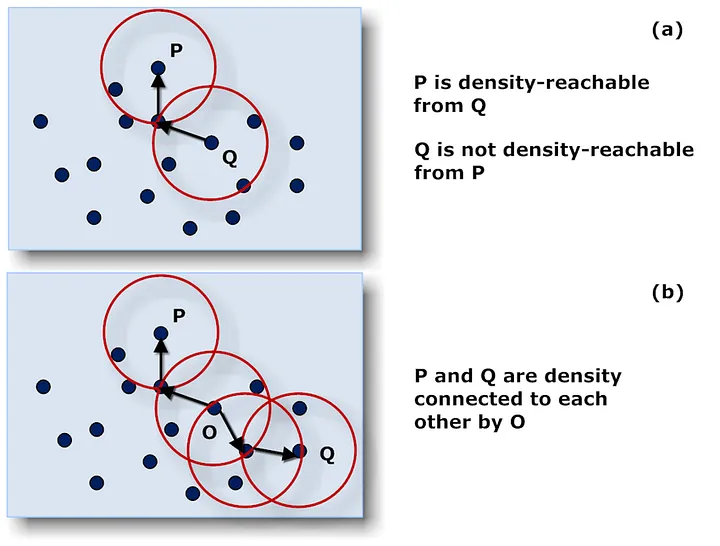

**How to choose ε (epsilon)?**
*   Domain knowledge
*   Elbow Method
*   Trial & Error






**How to choose the minimum number of points?**
*   The number of dimensions + 1; For higher dimensional data, may have to choose a higher number
*   If dense data set, then choose higher number. Else if sparse then choose lower number
*   If noisy then choose a higher number




**Assumptions**

1. Assumes that clusters are regions of high density separated by regions of lower density. Really good at handling clusters of arbitrary shapes and varying densities

2. Does not assume a specific shape for clusters.

3. Does not assume that clusters have the same density.

4. Sensitive of parameter settings. The value of ε determines the neighborhood size. Selecting appropriate values for these parameters is very important for getting meaningful clusters.

5. It assumes that noise points exists in the dataset.

7. It assumes relatively uniform density within a cluster.

**Pros:**


*   You don't need to specify the number of clusters
*   Able to identify noise data while clustering
*   Able to find arbitrarily size and arbitrarily shaped clusters


**Cons:**
*   Doesn't do well if there is varying density clusters
*   Doesn't do well with "neck" type datasets







This is what we mean by neck type data where there is sort of like a "neck" in between two dense regions.

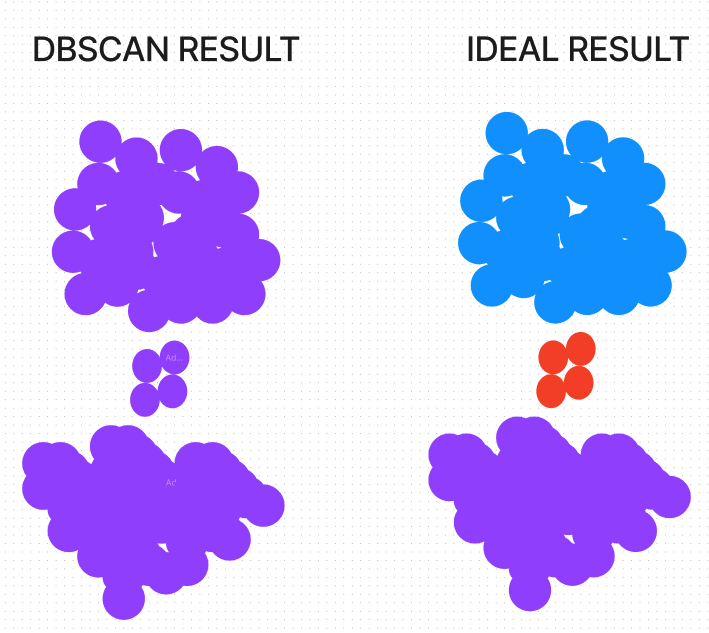

**Use Cases**
*   Handles cases where you have arbitrary and irregular shapes
*   Astronomy!!!
*   Geospatial data (dealing with maps, like highly densed populated areas, crime, real estate)
*   Anomaly Detection (Fraud, Spam, and Network security) because it can detect "unusual" data points







### Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
star_data = pd.read_csv('/content/drive/MyDrive/Star Data v2/data/StarDataset.csv')

**Data Dictionary**



*   Temperature (K) - the temperature of the star in Kelvins
*   Luminosity (L/Lo) - how bright the star is. Lo is watts
*   Radius (R/Ro) - radius of the star (solar radius)
*   Absolute Magnitude (Mv) - the intrinsic brightness of the star. Usefull for comparing true lumonisities of different objects without the influenceof their varying distance (this way a star that may be further away and a star that is closer are compared the same way)
*   Star Type - the predictor (0 = Brown Darf, 1 = Red Dwarf, 2 = White Dward, 3 = Main Sequence, 4 = Supergiant, 5 = Hypergiant)
*   Star Color - the color of the star
*   Spectral Class - classification of a star based on its characteristics. (O = very hot and blue, B = hot and blue, A = moderately hot and white, F = cooler than A-type, yellow-white, G = sun like sun, K = cooler than the sun, orange, M = cool and red, with M being the coolest











In [ ]:
star_data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


### Explore the data

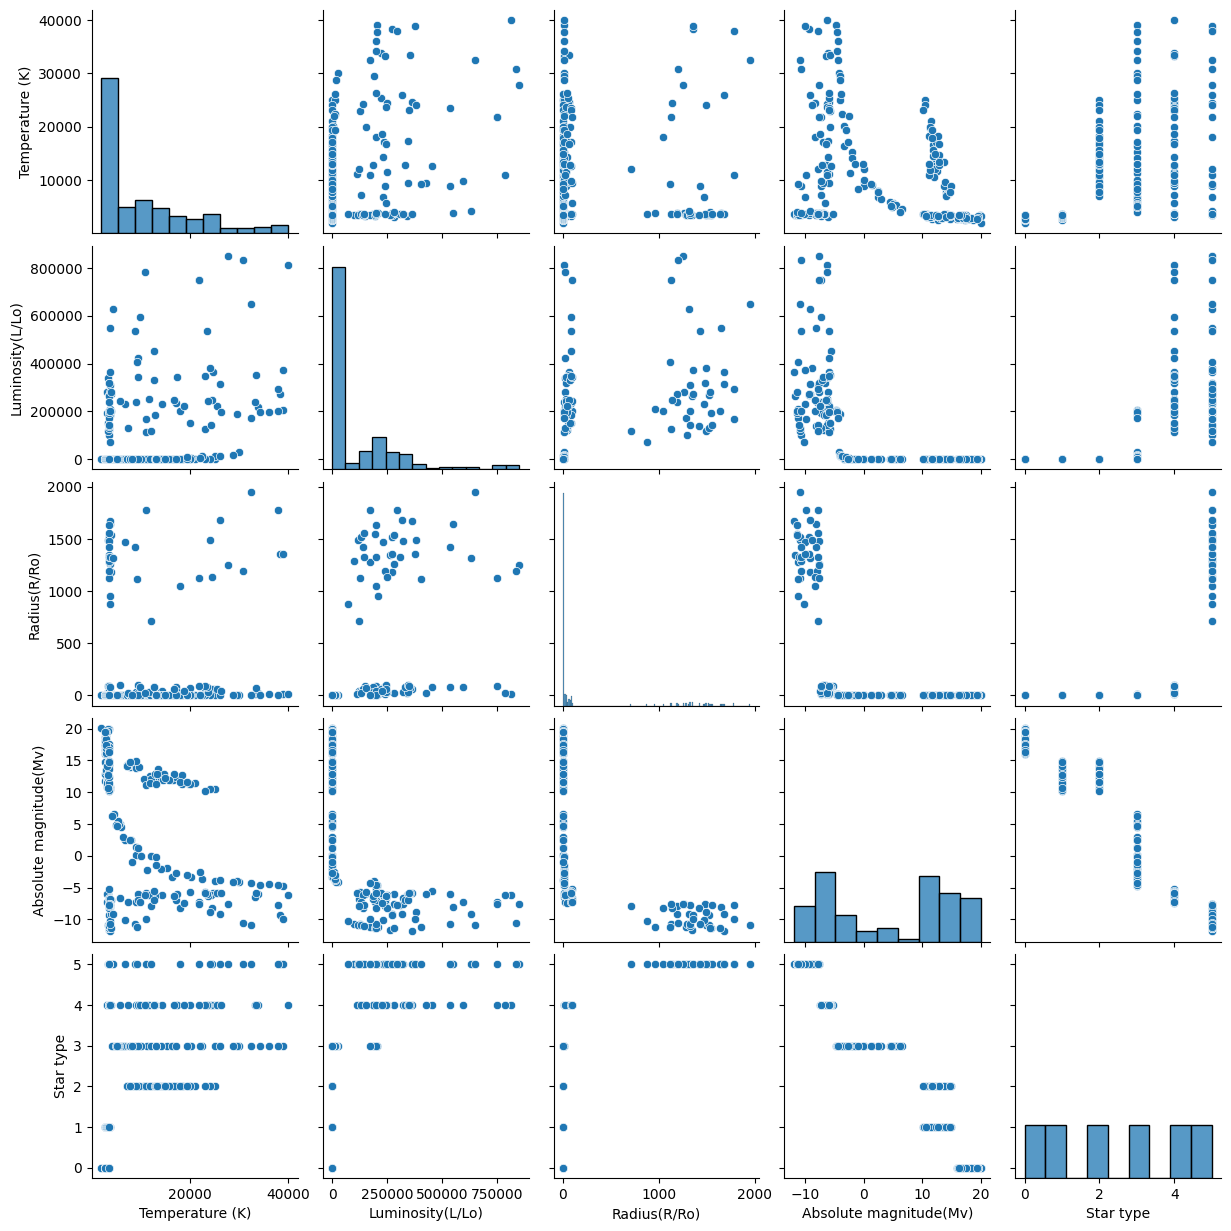

In [ ]:
import seaborn as sns

sns.pairplot(star_data)

### Normalize the data

In [4]:
from sklearn.preprocessing import StandardScaler
X_df = star_data[['Temperature (K)', 'Absolute magnitude(Mv)']]
X_array = X_df.values
scaler = StandardScaler()
normalized_X_array = scaler.fit_transform(X_array)
normalized_X_df = pd.DataFrame(X_df, columns=['Temperature (K)', 'Absolute magnitude(Mv)'])

### Figure out optimal ε (epsilon) with Nearest Neighbors Distance Plot

1.   For each point, compute the distance to its k-th nearest neighbor, where k is the minimum number of neighbors a point must have to be considered a core point. This number depends on your data.
2.   Plot these distances in ascending order.
3.   
The point where the curve in the plot starts to rise sharply (i.e., the "knee" or "elbow" of the curve) suggests a good ε value.



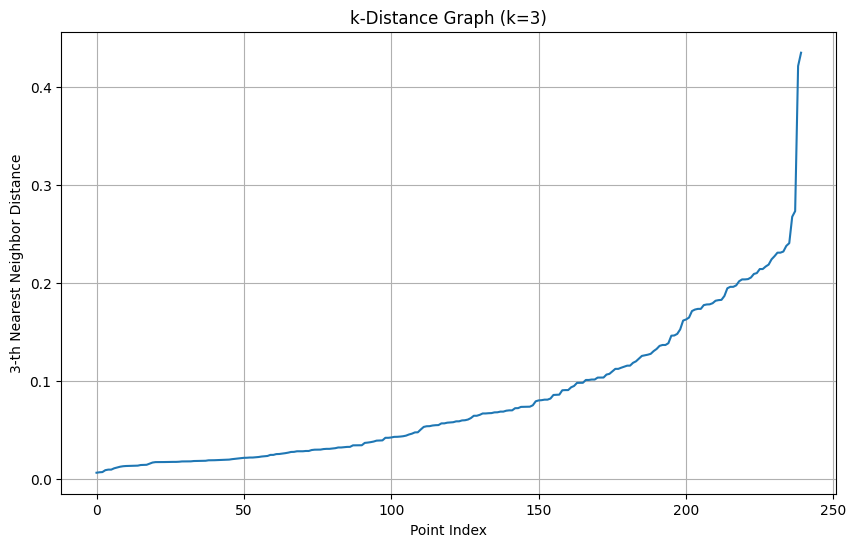

In [5]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

data = normalized_X_array

# Number of neighbors for the k-distance plot
k = 3

# Compute the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=k)
nearest_neighbors.fit(data)
distances, indices = nearest_neighbors.kneighbors(data)

# Sort the distances
distances = np.sort(distances, axis=0)
kth_distances = distances[:, k-1]

# Plotting the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(kth_distances)
plt.xlabel('Point Index')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.title(f'k-Distance Graph (k={k})')
plt.grid(True)
plt.show()

### Build out DBSCAN Model

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=3)
clustering = dbscan.fit(normalized_X_df)
labels = clustering.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

### Plot Result

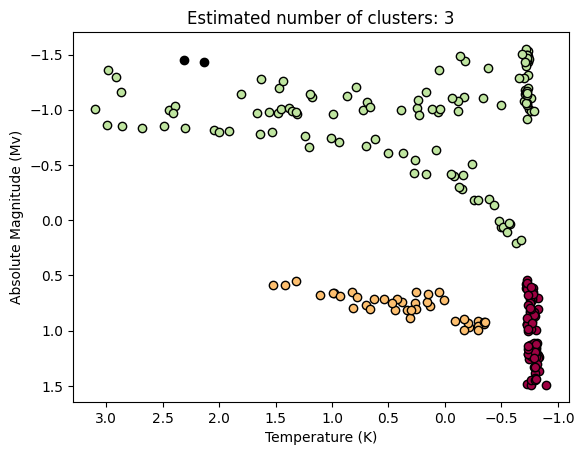

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = normalized_X_array[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

    xy = normalized_X_array[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")

# Inverting the x-axis and y-axis for H-R diagram representation
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.xlabel('Temperature (K)')
plt.ylabel('Absolute Magnitude (Mv)')

plt.show()

#### Expected Result using the Labelled Data

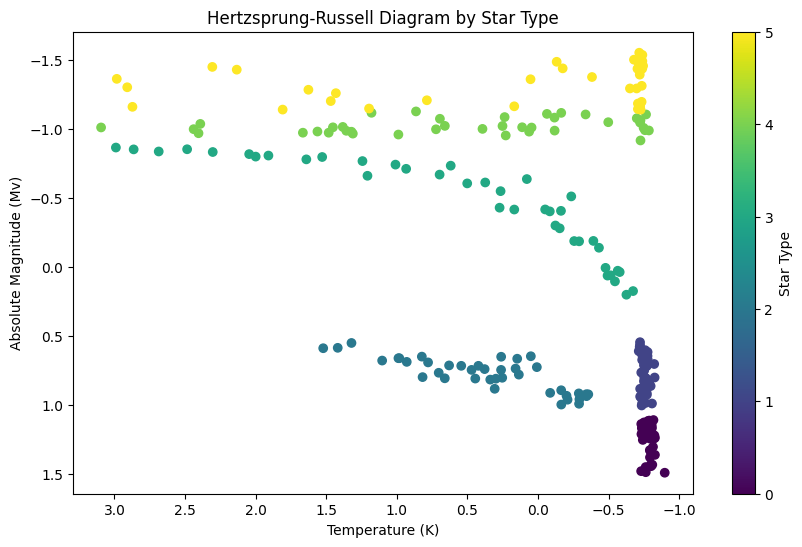

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(normalized_X_df['Temperature (K)'], normalized_X_df['Absolute magnitude(Mv)'],
                      c=star_data['Star type'], cmap='viridis')  # Use an appropriate colormap

# Inverting the x-axis and y-axis for traditional H-R diagram representation
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Labels and titles
plt.xlabel('Temperature (K)')
plt.ylabel('Absolute Magnitude (Mv)')
plt.title('Hertzsprung-Russell Diagram by Star Type')
plt.colorbar(scatter, label='Star Type')

plt.show()